In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from subprocess import check_output

In [23]:
# Reads the dataset and sets its index to car name
data = pd.read_csv('auto-mpg.csv',index_col='car name')

In [24]:
# Removes null values from horsepower
data = data[data.horsepower != '?']

In [25]:
# Fixes horsepower datatype
data.horsepower = data.horsepower.astype('float')

In [26]:
# Creates a relative data range between 0 and 1
def scale(a):
    b = (a-a.min())/(a.max()-a.min())
    return b

In [27]:
# Creates a copy of the dataset to work with
data_scale = data.copy()

In [28]:
# Formats the copy
data_scale ['displacement'] = scale(data_scale['displacement'])
data_scale['horsepower'] = scale(data_scale['horsepower'])
data_scale ['acceleration'] = scale(data_scale['acceleration'])
data_scale ['weight'] = scale(data_scale['weight'])
data_scale['mpg'] = scale(data_scale['mpg'])

In [29]:
# making country codes easy to read
data['Country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])
data_scale['Country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])

MPG/Origin Boxplot: Japan tends to have better MPG.

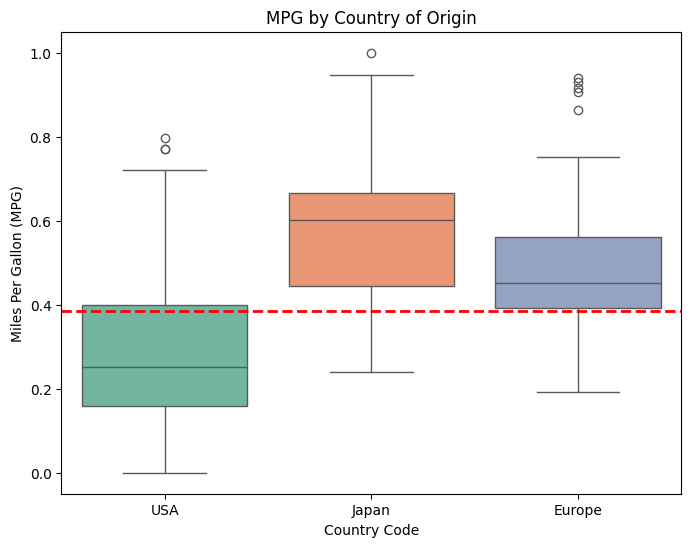

In [30]:
# Creating plot to show relationship b/n mpg and country of origin
var = 'Country_code'
data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
# Adding colors for each country
fig = sns.boxplot(x=var, y="mpg", data=data_plt, palette='Set2')
# Adding a line for the mean
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

plt.title('MPG by Country of Origin')
plt.xlabel('Country Code')
plt.ylabel('Miles Per Gallon (MPG)')
plt.show()

MPG/Year Boxplot: Later years tend to have better MPG.

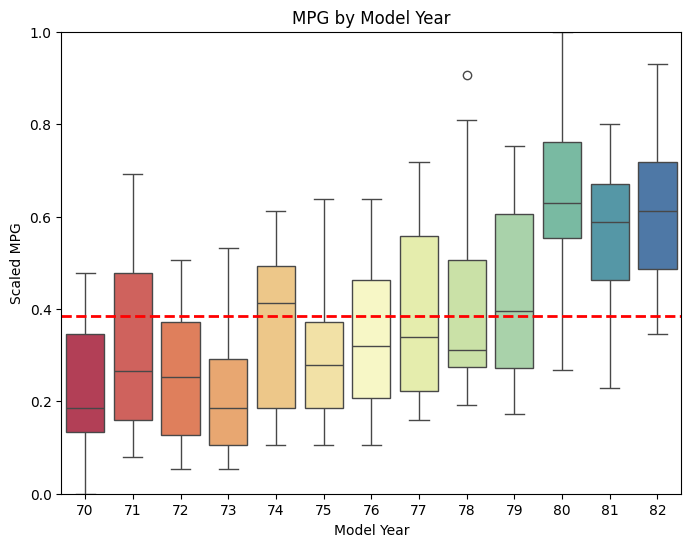

In [31]:
# Creating plot to show relationship between year manufactured and MPG
var = 'model year'
data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
# Adding color
fig = sns.boxplot(x=var, y="mpg", data=data_plt, palette='Spectral')
# Setting the axis to be between 0 and 1 to show relativity
fig.axis(ymin=0, ymax=1)
# Adding a horizontal line to depict the mean
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

plt.title('MPG by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Scaled MPG')

plt.show()

In [32]:
# Creating a map that sets the first word of the car to the Company Name
data['Company_Name'] = data.index.map(lambda x: x.split()[0])

In [33]:
# Fixes some typos
data['Company_Name'] = data['Company_Name'].replace(['volkswagen','vokswagen','vw'],'VW')
data['Company_Name'] = data['Company_Name'].replace('maxda','mazda')
data['Company_Name'] = data['Company_Name'].replace('toyouta','toyota')
data['Company_Name'] = data['Company_Name'].replace('mercedes','mercedes-benz')
data['Company_Name'] = data['Company_Name'].replace('nissan','datsun')
data['Company_Name'] = data['Company_Name'].replace('capri','ford')
data['Company_Name'] = data['Company_Name'].replace(['chevroelt','chevy'],'chevrolet')
data['Company_Name'].fillna(value = 'subaru',inplace=True)

Manufacturer/MPG Boxplot: Datsun, VW, and Toyota tend to have the best MPG.

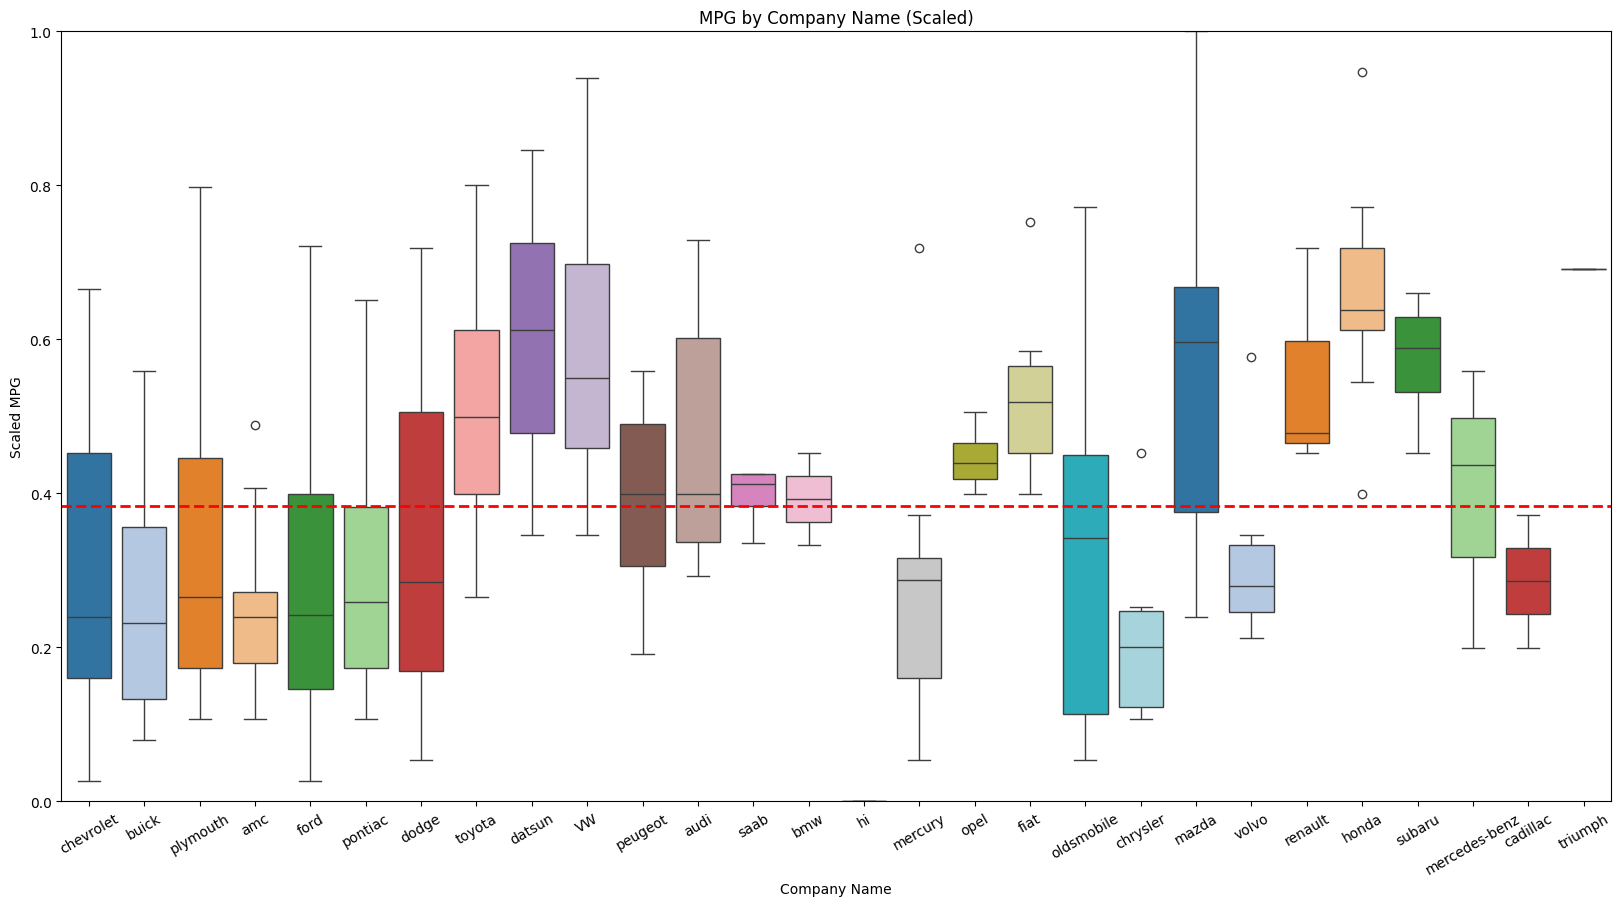

In [34]:
# Creating a plot to show relationship between manufacturer and MPG
var = 'Company_Name'
data_plt = pd.concat([data_scale['mpg'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(20,10))

# Sets a color palette
fig = sns.boxplot(x=var, y="mpg", data=data_plt, palette='tab20')
fig.set_xticklabels(ax.get_xticklabels(),rotation=30)
# Sets range from 0 to 1 to demonstrate relative differences
fig.axis(ymin=0, ymax=1)
# Adds a horizontal line to depict the mean
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

plt.title('MPG by Company Name (Scaled)')
plt.xlabel('Company Name')
plt.ylabel('Scaled MPG')

plt.show()

Displacement/MPG scatterplot showing negative correlation.

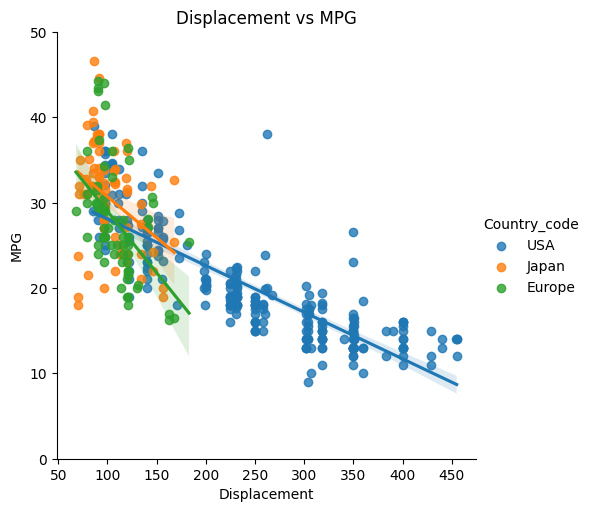

In [35]:
var = 'displacement'
# Creates a scatter plot colored by country code for distinguishing.
# Compares displacement and MPG
plot = sns.lmplot(x=var, y='mpg', data=data, hue='Country_code')
# Sets the axis to exclusively the most relevant range of MPG
plot.set(ylim=(0, 50))

plt.title('Displacement vs MPG')
plt.xlabel('Displacement')
plt.ylabel('MPG')

plt.show()

Weight/MPG scatterplot showing negative correlation.

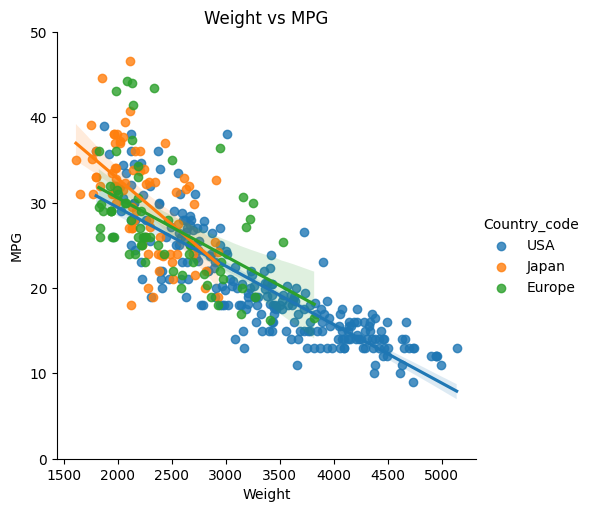

In [36]:
var = 'weight'
# Creates a scatterplot colored by country code
# Shows MPG vs Weight
plot = sns.lmplot(x=var, y='mpg', data=data, hue='Country_code')
# Sets range to be exclusively the relevant range of MPG
plot.set(ylim=(0, 50))

plt.title('Weight vs MPG')
plt.xlabel('Weight')
plt.ylabel('MPG')

plt.show()

Is there a relationship between horsepower and acceleration?

In [37]:
# Sets horsepower variable
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')

In [38]:
# Cleans null values
data.dropna(subset=['horsepower'], inplace=True)

Scatterplot showing that the more horsepower, the faster the car accelerates. (technically positive correlation, although seconds decreases as horsepower increases)

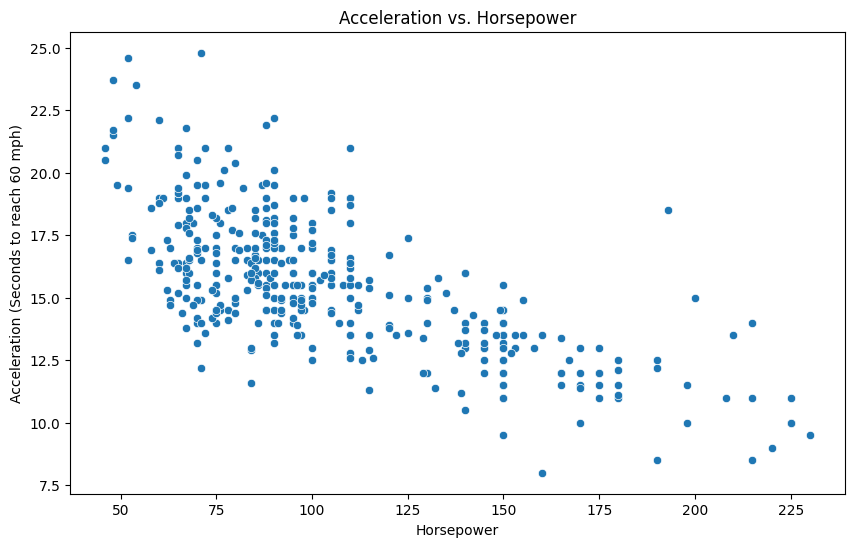

In [39]:
# Sets size of the plot
plt.figure(figsize=(10, 6))
# Creates horsepower vs acceleration scatterplot
sns.scatterplot(x='horsepower', y='acceleration', data=data)

plt.title('Acceleration vs. Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Acceleration (Seconds to reach 60 mph)')
plt.show()

Is there a relationship between Cylinders and Displacement?

Boxplot showing the more cylinders, the more displacement (positive correlation)

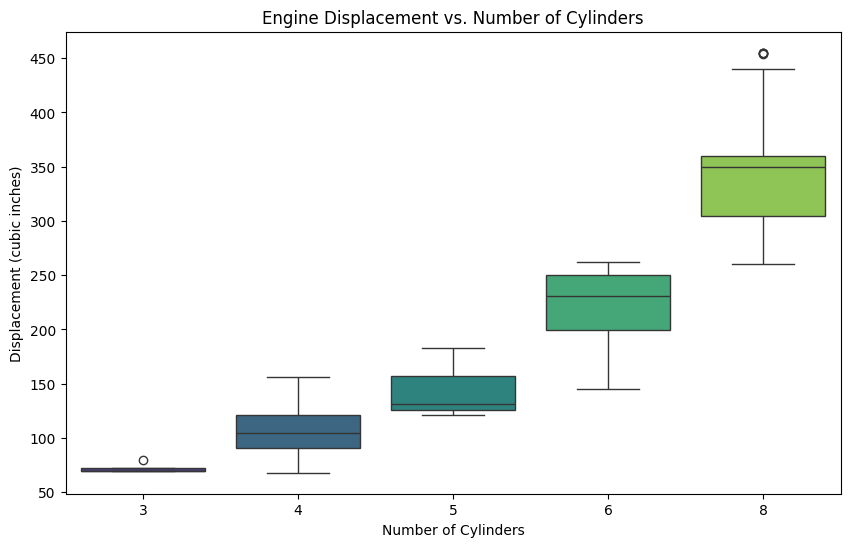

In [40]:
# Sets size of the boxplot
plt.figure(figsize=(10, 6))
# Creates the boxplot
sns.boxplot(x='cylinders', y='displacement', data=data, palette='viridis')

plt.title('Engine Displacement vs. Number of Cylinders')
plt.xlabel('Number of Cylinders')
plt.ylabel('Displacement (cubic inches)')
plt.show()